<a href="https://colab.research.google.com/github/alexandre-braga/DCC190/blob/main/DCC190_Trabalho_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho - Parte B

1.   Meio Homogêneo
2.   Meio Heterogêneo



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import matplotlib as mpl
import pandas as pd
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import os
from google.colab import files

In [12]:
def TDMASolve(a, b, c, d):
  nmax = len(d)#n em números é linhas

  # Modifica o primeiro coeficiente de cada linha
  c[0] /= b[0] #Risco de divisão por zero.
  d[0] /= b[0]

  for i in range(1, nmax):
    ptemp = b[i] - (a[i] * c[i-1])
    c[i] /= ptemp
    d[i] = (d[i] - a[i] * d[i-1])/ptemp

  #Substituição de volta
  x = [0 for i in range(nmax)]
  x[-1] = d[-1]
  for i in range(-2,-nmax-1,-1):
    x[i] = d[i] - c[i] * x[i+1]
  return x

In [13]:
def xbarra(t,x,y):
  return x*np.cos(4*t) + y*np.sin(4*t)
def ybarra(t,x,y):
  return -x*np.sin(4*t) + y*np.cos(4*t)

def exata(eps, gamma, t, x, y):
  xc = 0.2
  yc = 0
  gamma2 = gamma*gamma
  return (2*gamma2/(2*gamma2 + 4*eps*t) ) * np.exp( - ( (xbarra(t,x,y) - xc)**2 + (ybarra(t,x,y) - yc)**2 )/(2*gamma2 + 4*eps*t) )

In [14]:
# função que gera saidas vtk para o paraview
def gera_vtk(nome, dado, nx, ny):
    print(nome)
    if not os.path.exists(nome.split('/')[0]):
        os.makedirs(nome.split('/')[0])
    
    arqvtk = open(nome, "w")
    texto = []
    
    texto.append("# vtk DataFile Version 3.0\n")
    texto.append("vtk output\n")
    texto.append("ASCII\n")
    texto.append("DATASET RECTILINEAR_GRID\n")
    texto.append("DIMENSIONS " + str(nx+1) + " " + str(ny+1) + " 1\n")
    
    texto.append("X_COORDINATES " + str(nx+1) + " double\n")
    for ix in range(nx+1):
        texto.append(str(ix) + " ")
    texto.append("\n")
    
    texto.append("Y_COORDINATES " + str(ny+1) + " double\n")
    for jy in range(ny+1):
        texto.append(str(jy) + " ")
    texto.append("\n")
    
    texto.append("Z_COORDINATES 1 double\n")
    texto.append("0\n")

    texto.append("POINT_DATA " + str((nx+1)*(ny+1)) + "\n")
    texto.append("FIELD FieldData 1\n")
    texto.append("Concentracao 1 " + str((nx+1)*(ny+1)) + " double\n")
    for jy in range(ny+1):
        for ix in range(nx+1):
                texto.append(str(dado[ix][jy]) + " ")
    texto.append("\n")
    
    arqvtk.writelines(texto)
    arqvtk.close()

#Homogêneo

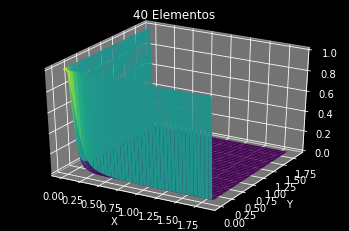

velocity0_vtk/saida0.vtk


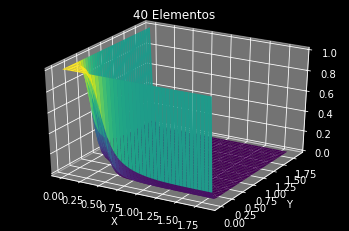

velocity0_vtk/saida10.vtk


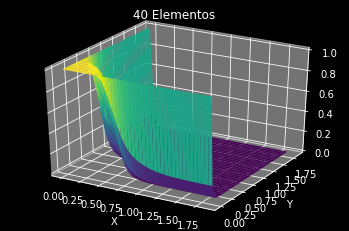

velocity0_vtk/saida20.vtk


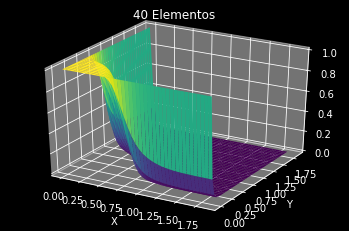

velocity0_vtk/saida30.vtk


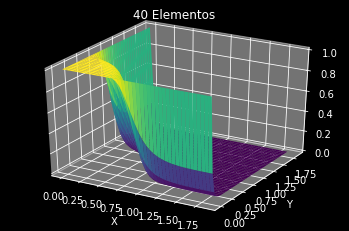

velocity0_vtk/saida40.vtk


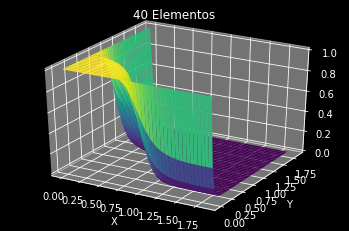

velocity0_vtk/saida50.vtk


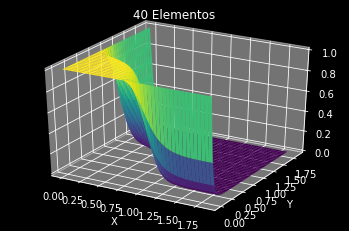

velocity0_vtk/saida60.vtk


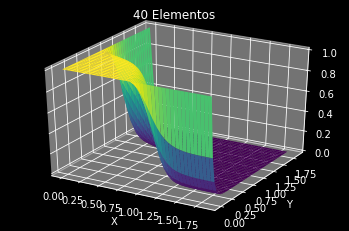

velocity0_vtk/saida70.vtk


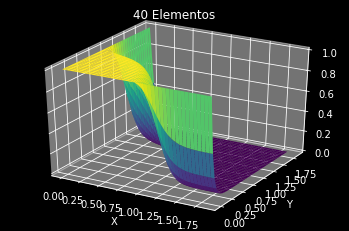

velocity0_vtk/saida80.vtk


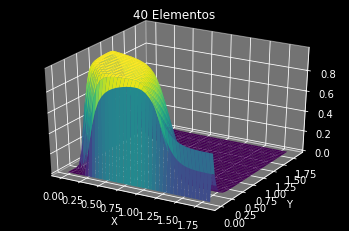

velocity0_vtk/saida90.vtk


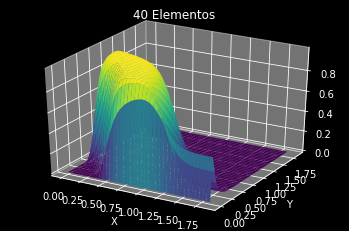

velocity0_vtk/saida100.vtk


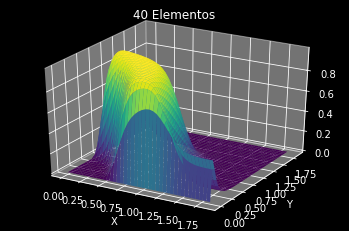

velocity0_vtk/saida110.vtk


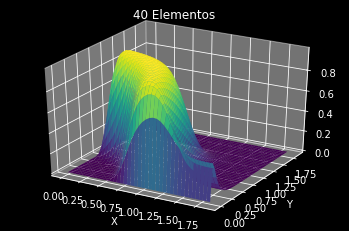

velocity0_vtk/saida120.vtk


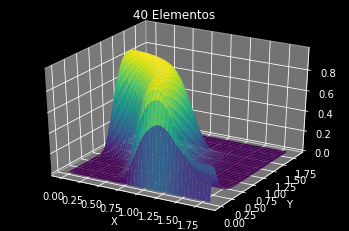

velocity0_vtk/saida130.vtk


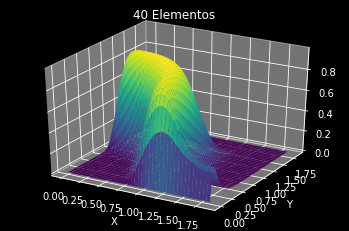

velocity0_vtk/saida140.vtk


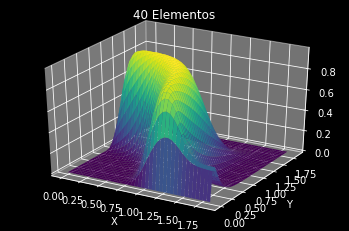

velocity0_vtk/saida150.vtk


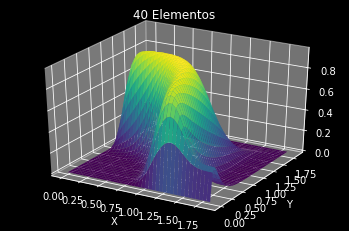

velocity0_vtk/saida160.vtk


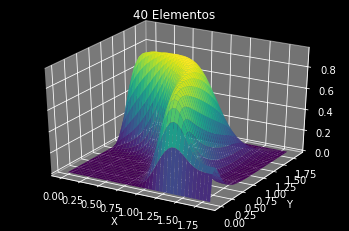

velocity0_vtk/saida170.vtk


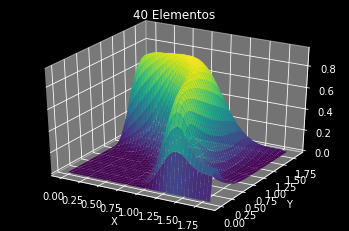

velocity0_vtk/saida180.vtk


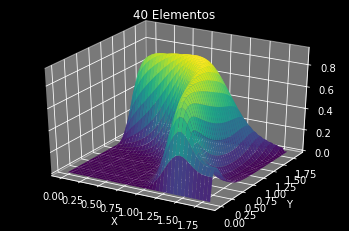

velocity0_vtk/saida190.vtk


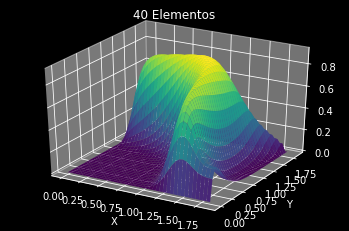

velocity0_vtk/saida200.vtk


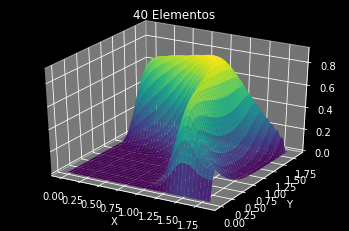

velocity0_vtk/saida210.vtk


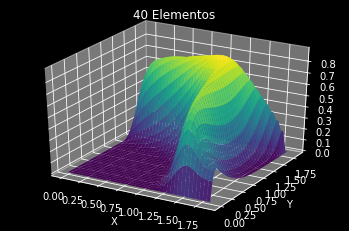

velocity0_vtk/saida220.vtk


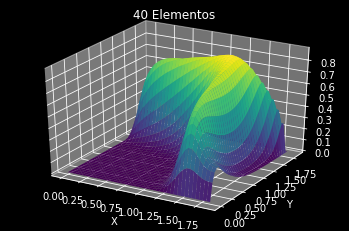

velocity0_vtk/saida230.vtk


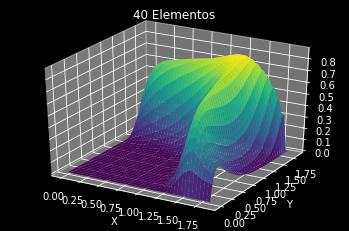

velocity0_vtk/saida240.vtk


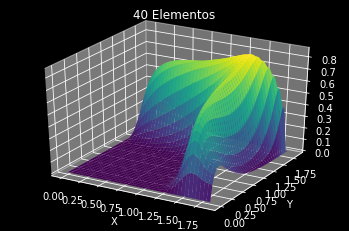

velocity0_vtk/saida250.vtk


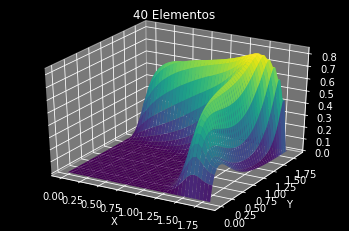

velocity0_vtk/saida260.vtk


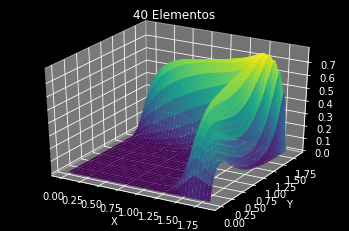

velocity0_vtk/saida270.vtk


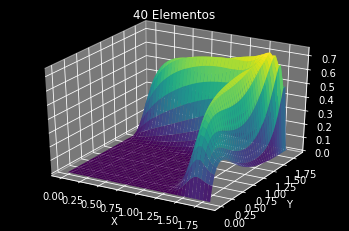

velocity0_vtk/saida280.vtk


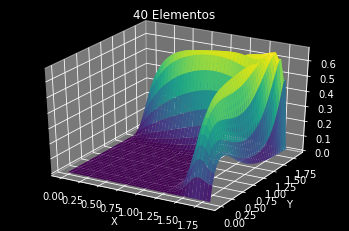

velocity0_vtk/saida290.vtk


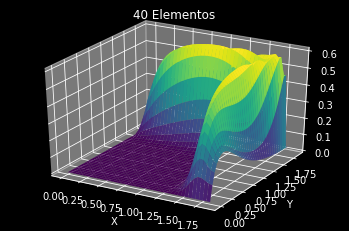

velocity0_vtk/saida300.vtk


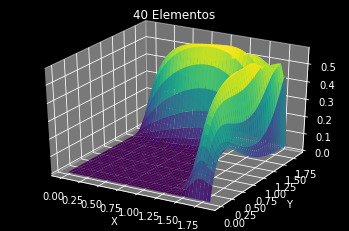

velocity0_vtk/saida310.vtk


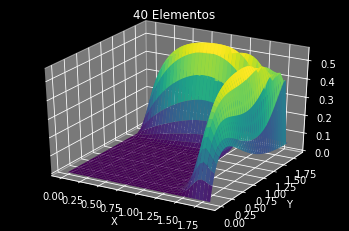

velocity0_vtk/saida320.vtk


In [22]:
nel = 40

# dominio espacial
xi = 0
xf = 1.8540746773
# espaçamento entre os elementos
h = (xf-xi)/nel
h2 = h*h

#dominio temporal
ti = 0
tf = 15
#espaçamento temporal
dt = h

#coeficiente difusivo
eps = 0.00001

sigma = eps*dt/h2
x = np.linspace(xi,xf,nel+1)
y = np.linspace(xi,xf,nel+1)
ux = np.zeros((nel+1,nel+1))
uy = np.zeros((nel+1,nel+1))
a = np.zeros(nel+1)
b = np.zeros(nel+1)
c = np.zeros(nel+1)
d = np.zeros(nel+1)

# lendo campo de velocidades
vel_field = pd.read_table("velocity.dat", header = 0, sep = '  ', engine='python')
vel_field = np.array(vel_field)    

vx = [[ vel_field[i, 0] for i in range(j*(nel+1), (j+1)*(nel+1))] for j in range(nel+1)]
vy = [[ vel_field[i, 1] for i in range(j*(nel+1), (j+1)*(nel+1))] for j in range(nel+1)]

bx = np.matrix(vx).transpose()
by = np.matrix(vy).transpose()

t = ti
k = 0
nome = "velocity0"

while(t < tf):

#### PRIMEIRO PASSO ####
  t = t + dt/2

  for j in range(0,nel+1):
    for i in range(0,nel+1):
      rho1 = bx[i,j]*dt/h
      rho2 = by[i,j]*dt/h

      #construcao da matriz
      a[i] = -sigma/2
      b[i] = 1 + sigma
      if (i == 0 or i == nel):
        b[i] -= sigma/2  
      c[i] = -sigma/2

      if (rho1 > 0):
        a[i] -= rho1/2
        if(i > 0):
          b[i] += rho1/2
      if (rho1 < 0):
        if(i < nel):
          b[i] -= rho1/2
        c[i] += rho1/2

      # construcao do vetor fonte
      d[i] = (1 - sigma)*uy[i,j]
      if(j == nel):
        d[i] += sigma/2*(uy[i,j] + uy[i,j-1])
      elif(j == 0):
        d[i] += sigma/2*(uy[i,j+1] + uy[i,j])
      else:
        d[i] += sigma/2*(uy[i,j+1] + uy[i,j-1])

      #restrição extra pelo termo q rho2 multiplica
      if (rho2 > 0 and j > 0):
        d[i] -= rho2/2*(uy[i,j] - uy[i,j-1])
      if (rho2 < 0 and j < nel):
        d[i] -= rho2/2*(uy[i,j+1] - uy[i,j])

    if j == 0:
      a[0] = 0
      b[0] = 1
      c[0] = 0
      d[0] = 1
    if t < 4:
      d[0] = 1
    else:
      d[0] = 0

    ux[0:nel+1,j] = TDMASolve(a,b,c,d)

#### SEGUNDO PASSO ####
  t = t + dt/2

  for i in range(0,nel+1):
    for j in range(0,nel+1):
      #fazer de forma q dependa de rho1 ao inves de b1
      rho1 = bx[i,j]*dt/h
      rho2 = by[i,j]*dt/h

      #construcao da matriz
      a[j] = - sigma/2
      b[j] = 1 + sigma
      if (j == 0 or j == nel):
        b[j] -= sigma/2 
      c[j] = - sigma/2

      if (rho2 > 0):
        a[j] += -rho2/2
        if(j > 0):
          b[j] += rho2/2
      if (rho2 < 0):  
        if(j < nel):   
          b[j] += -rho2/2
        c[j] += rho2/2

      # construcao do vetor fonte 
      if(i == nel):
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i,j] + ux[i-1,j])
      elif(i == 0):
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i+1,j] + ux[i,j])
      else:
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i+1,j] + ux[i-1,j])

      #restrição extra pelo termo q rho1 multiplica, mas por essa restrição B tbm precisa ser restrito
      if (rho1 > 0 and i > 0):
        d[j] += -rho1/2*(ux[i,j] - ux[i-1,j])
      if (rho1 < 0 and i < nel):
        d[j] += -rho1/2*(ux[i+1,j] - ux[i,j])

    if i == 0:
      a[0] = 0
      b[0] = 1
      c[0] = 0
      d[0] = 1
    if t < 4:
      d[0] = 1
    else:
      d[0] = 0
      
    uy[i,0:nel+1] = TDMASolve(a,b,c,d)  

  if(k % 10 == 0):
    X,Y = np.meshgrid(x,y)
    plt.style.use("dark_background")
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    surf = ax.plot_surface(X, Y, uy, cmap = cm.viridis, label='aproximada')

    plt.title('%i Elementos' %nel)
    plt.show()

    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    gera_vtk(nome_saida, uy, nel, nel)

  k = k + 1

In [ ]:
for k in range(0,340):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

In [ ]:
for k in range(90,340):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

In [ ]:
for k in range(190,340):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

In [ ]:
for k in range(270,340):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

#Heterogêneo

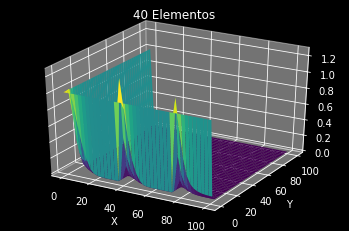

velocity5_vtk/saida0.vtk


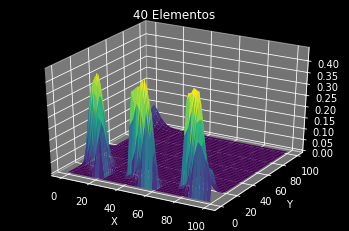

velocity5_vtk/saida10.vtk


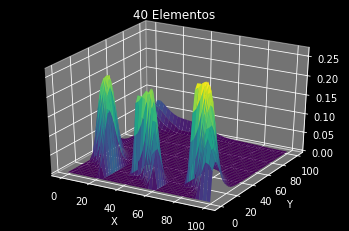

velocity5_vtk/saida20.vtk


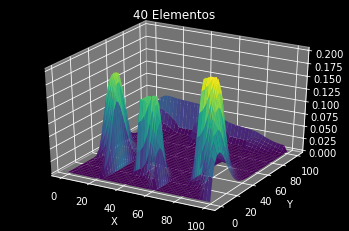

velocity5_vtk/saida30.vtk


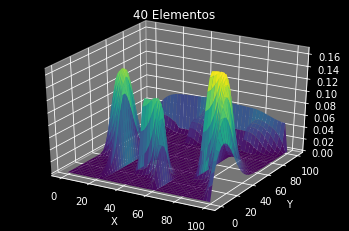

velocity5_vtk/saida40.vtk


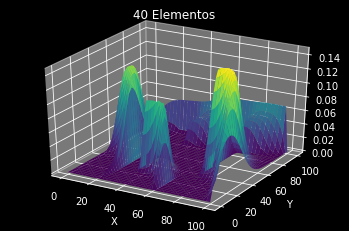

velocity5_vtk/saida50.vtk


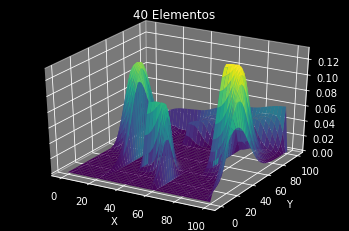

velocity5_vtk/saida60.vtk


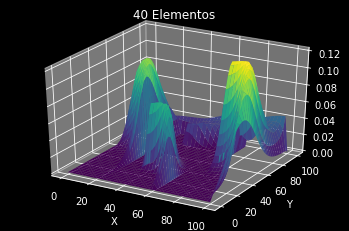

velocity5_vtk/saida70.vtk


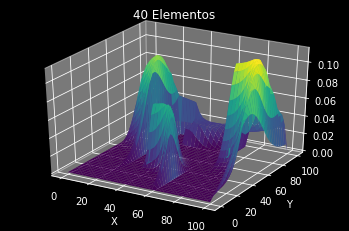

velocity5_vtk/saida80.vtk


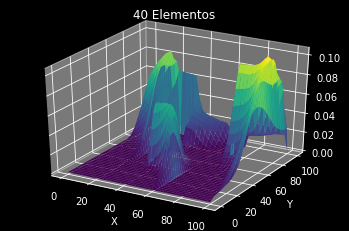

velocity5_vtk/saida90.vtk


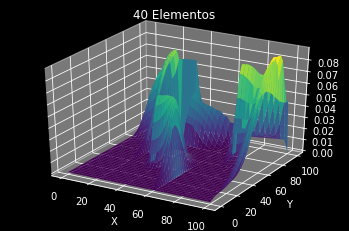

velocity5_vtk/saida100.vtk


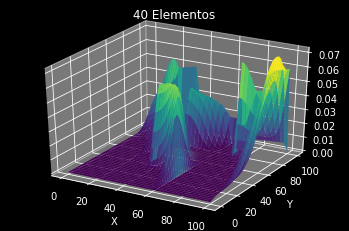

velocity5_vtk/saida110.vtk


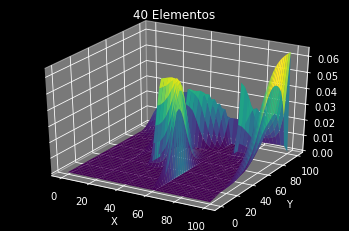

velocity5_vtk/saida120.vtk


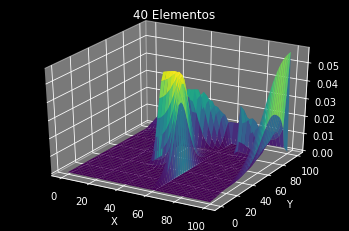

velocity5_vtk/saida130.vtk


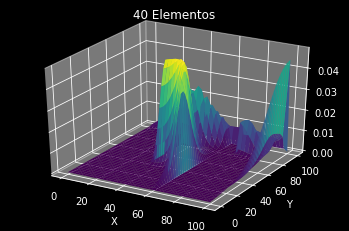

velocity5_vtk/saida140.vtk


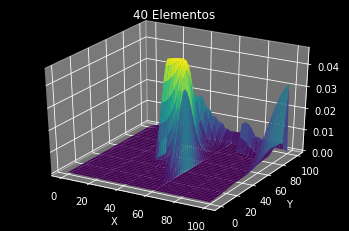

velocity5_vtk/saida150.vtk


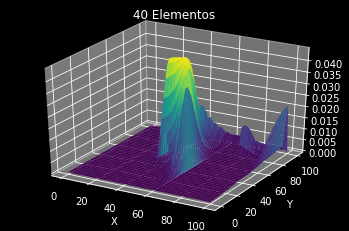

velocity5_vtk/saida160.vtk


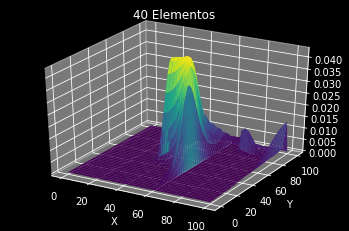

velocity5_vtk/saida170.vtk


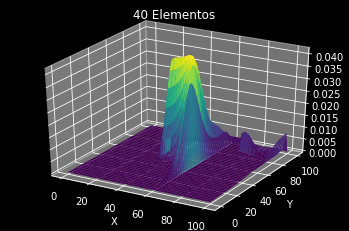

velocity5_vtk/saida180.vtk


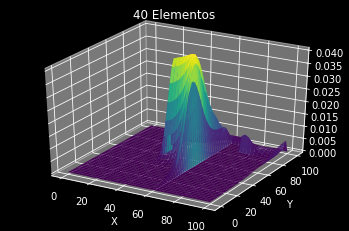

velocity5_vtk/saida190.vtk


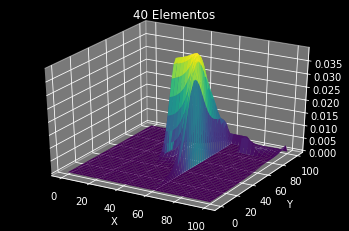

velocity5_vtk/saida200.vtk


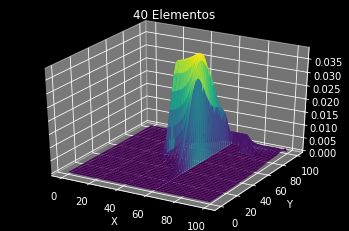

velocity5_vtk/saida210.vtk


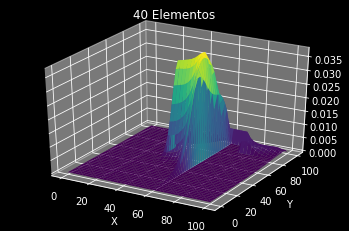

velocity5_vtk/saida220.vtk


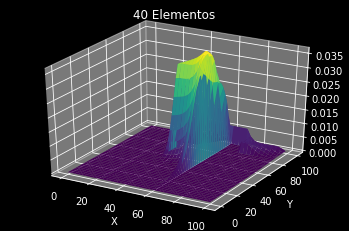

velocity5_vtk/saida230.vtk


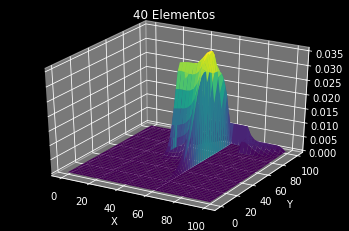

velocity5_vtk/saida240.vtk


In [84]:
nel = 40

# dominio espacial
xi = 0
xf = 100
# espaçamento entre os elementos
h = (xf-xi)/nel
h2 = h*h

#dominio temporal
ti = 0
tf = 250
#espaçamento temporal
dt = 1

#coeficiente difusivo
eps = 0.00001

sigma = eps*dt/h2
x = np.linspace(xi,xf,nel+1)
y = np.linspace(xi,xf,nel+1)
ux = np.zeros((nel+1,nel+1))
uy = np.zeros((nel+1,nel+1))
a = np.zeros(nel+1)
b = np.zeros(nel+1)
c = np.zeros(nel+1)
d = np.zeros(nel+1)

velocityAtual = "velocity5"
# lendo campo de velocidades
vel_field = pd.read_table( velocityAtual + ".dat", header = 0, sep = '  ', engine='python')
vel_field = np.array(vel_field)    

vx = [[ vel_field[i, 0] for i in range(j*(nel+1), (j+1)*(nel+1))] for j in range(nel+1)]
vy = [[ vel_field[i, 1] for i in range(j*(nel+1), (j+1)*(nel+1))] for j in range(nel+1)]

bx = np.matrix(vx).transpose()
by = np.matrix(vy).transpose()

t = ti
k = 0
nome = velocityAtual

while(t < tf):

#### PRIMEIRO PASSO ####
  t = t + dt/2

  for j in range(0,nel+1):
    for i in range(0,nel+1):
      rho1 = bx[i,j]*dt/h
      rho2 = by[i,j]*dt/h

      #construcao da matriz
      a[i] = -sigma/2
      b[i] = 1 + sigma
      if (i == 0 or i == nel):
        b[i] -= sigma/2  
      c[i] = -sigma/2

      if (rho1 > 0):
        a[i] -= rho1/2
        if(i > 0):
          b[i] += rho1/2
      if (rho1 < 0):
        if(i < nel):
          b[i] -= rho1/2
        c[i] += rho1/2

      # construcao do vetor fonte
      d[i] = (1 - sigma)*uy[i,j]
      if(j == nel):
        d[i] += sigma/2*(uy[i,j] + uy[i,j-1])
      elif(j == 0):
        d[i] += sigma/2*(uy[i,j+1] + uy[i,j])
      else:
        d[i] += sigma/2*(uy[i,j+1] + uy[i,j-1])

      #restrição extra pelo termo q rho2 multiplica
      if (rho2 > 0 and j > 0):
        d[i] -= rho2/2*(uy[i,j] - uy[i,j-1])
      if (rho2 < 0 and j < nel):
        d[i] -= rho2/2*(uy[i,j+1] - uy[i,j])

    if j == 0:
      a[0] = 0
      b[0] = 1
      c[0] = 0
      d[0] = 1
    if t < 4:
      d[0] = 1
    else:
      d[0] = 0

    ux[0:nel+1,j] = TDMASolve(a,b,c,d)

#### SEGUNDO PASSO ####
  t = t + dt/2

  for i in range(0,nel+1):
    for j in range(0,nel+1):
      #fazer de forma q dependa de rho1 ao inves de b1
      rho1 = bx[i,j]*dt/h
      rho2 = by[i,j]*dt/h

      #construcao da matriz
      a[j] = - sigma/2
      b[j] = 1 + sigma
      if (j == 0 or j == nel):
        b[j] -= sigma/2 
      c[j] = - sigma/2

      if (rho2 > 0):
        a[j] += -rho2/2
        if(j > 0):
          b[j] += rho2/2
      if (rho2 < 0):  
        if(j < nel):   
          b[j] += -rho2/2
        c[j] += rho2/2

      # construcao do vetor fonte 
      if(i == nel):
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i,j] + ux[i-1,j])
      elif(i == 0):
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i+1,j] + ux[i,j])
      else:
        d[j] = (1 - sigma)*ux[i,j] + sigma/2*(ux[i+1,j] + ux[i-1,j])

      #restrição extra pelo termo q rho1 multiplica, mas por essa restrição B tbm precisa ser restrito
      if (rho1 > 0 and i > 0):
        d[j] += -rho1/2*(ux[i,j] - ux[i-1,j])
      if (rho1 < 0 and i < nel):
        d[j] += -rho1/2*(ux[i+1,j] - ux[i,j])

    if i == 0:
      a[0] = 0
      b[0] = 1
      c[0] = 0
      d[0] = 1
    if t < 4:
      d[0] = 1
    else:
     d[0] = 0
      
    uy[i,0:nel+1] = TDMASolve(a,b,c,d)  


  if(k % 10 == 0):
    X,Y = np.meshgrid(x,y)
    plt.style.use("dark_background")
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    surf = ax.plot_surface(X, Y, uy, cmap = cm.viridis, label='aproximada')

    plt.title('%i Elementos' %nel)
    plt.show()
    
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    gera_vtk(nome_saida, uy, nel, nel)
  
  k = k + 1

In [85]:
for k in range(0,250):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
for k in range(100,250):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
for k in range(200,250):
  if(k % 10 == 0):
    nome_saida = nome + '_vtk/saida' + str(k) + '.vtk'
    files.download(nome_saida)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>